In [1]:
%matplotlib inline


==========================================
One-class SVM with non-linear kernel (RBF)
==========================================

An example using a one-class SVM for novelty detection.

`One-class SVM <svm_outlier_detection>` is an unsupervised
algorithm that learns a decision function for novelty detection:
classifying new data as similar or different to the training set.



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm
import pandas as pd




In [3]:
# Generate train data
X = 0.3 * np.random.randn(1000, 13)

In [4]:
X.shape

(1000, 13)

In [5]:
X_train = np.r_[X + 2, X - 2]

In [6]:
X_train= pd.DataFrame(X_train)
type(X_train
)

pandas.core.frame.DataFrame

In [7]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve, roc_auc_score

In [8]:
#X_Train, X_Test = train_test_split(X_train,test_size = 0.5,random_state = 42)


In [25]:
#X_Test =   # Generate some abnormal novel observations
X_Test = np.random.uniform(low=-4, high=4, size=(2000, 13))


In [26]:
X_Train =X_train

clf = svm.OneClassSVM(nu=0.1,kernel = "rbf", gamma =0.1)
y_score = clf.fit(X_Train).decision_function(X_Test)

pred = clf.predict(X_Train)



In [27]:
type(pred)

numpy.ndarray

In [28]:
unique, counts = np.unique(pred, return_counts=True)

In [29]:
dict(zip(unique, counts))

{-1.0: 198, 1.0: 1802}

In [30]:
X_Train.shape

(2000, 13)

In [31]:
X_Test.shape

(2000, 13)

In [32]:
fpr,tpr,thresholds = roc_curve(pred,y_score)

roc_auc = roc_auc_score(pred,y_score)

In [33]:
X_Train.shape

(2000, 13)

In [34]:
X_Test.shape

(2000, 13)

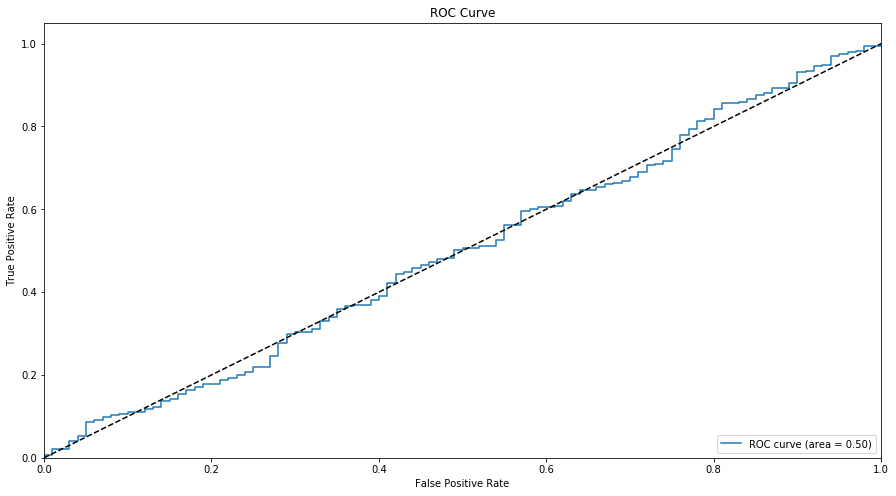

In [25]:
plt.figure(figsize=(15, 8))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [6]:
X_train.shape

(200, 13)

In [27]:
# Generate some regular novel observations
X = 0.3 * np.random.randn(20, 13)


In [28]:
X.shape

(20, 13)

In [29]:
X_test = np.r_[X + 2, X - 2]

In [30]:
X_test.shape

(40, 13)

In [31]:
# Generate some abnormal novel observations
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 13))

In [32]:
X_outliers.shape

(20, 13)

In [33]:
# fit the model
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size


In [34]:

# # plot the line, the points, and the nearest vectors to the plane
# Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
# Z = Z.reshape(xx.shape)


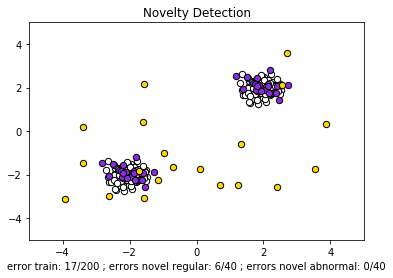

In [35]:
plt.title("Novelty Detection")
# plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
# a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
# plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')

s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=s, edgecolors='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='blueviolet', s=s,
                 edgecolors='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='gold', s=s,
                edgecolors='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
# plt.legend([a.collections[0], b1, b2, c],
#            ["learned frontier", "training observations",
#             "new regular observations", "new abnormal observations"],
#            loc="upper left",
#            prop=matplotlib.font_manager.FontProperties(size=11))
plt.xlabel(
    "error train: %d/200 ; errors novel regular: %d/40 ; "
    "errors novel abnormal: %d/40"
    % (n_error_train, n_error_test, n_error_outliers))
plt.show()